In [ ]:
## Make series of three hovmoller plots of binned frequency, intensity, and f*i

#PLOT 1: Climatology
#PLOT 2: Changes, 1980-2007 v 1951-1979
#PLOT 3: Changes, 1994-2007 v 1980-1993

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
%matplotlib notebook
%load_ext autotime
from bootstrap import *
import numpy.ma as ma
from chr_matplotlib import remappedColorMap

In [2]:
## CLIMATOLOGY PLOT ##

## LOAD FROM NETCDF ##
ferretdir = "/Users/Siwen/Desktop/Ferret/bin/"

#bounding years for climatology
yb=1951 
ye=2007

#load 57-year climatology
yb_last2= str(yb-1900)
print(yb_last2)
ye_last2= str("{0:0=2d}".format((ye-1900)%100))
print(ye_last2)

51
07
time: 2.62 ms


In [3]:
## LOAD FREQUENCY HOVMOLLER ##
loadfile = "RDA_hov_periods"
loadname = ferretdir + loadfile + '.nc'

#import from netCDF file
freq_climo_netcdf = nc.Dataset(loadname, "r")
freq_climo = freq_climo_netcdf['lat_hov_smth_' + yb_last2 + ye_last2][:]

#close it
freq_climo_netcdf.close()

time: 15.5 ms


In [4]:
## LOAD INTENSITY HOVMOLLER CLIMATOLOGY ##
loadfile = "RDA_int_climo"
loadname = ferretdir + loadfile + '.nc'

#import from netCDF file and load 57-year climatology
int_climo_netcdf = nc.Dataset(loadname, "r")
int_climo = int_climo_netcdf['int_mean_' + yb_last2 + ye_last2][:]

#close it
int_climo_netcdf.close()


time: 15.8 ms


In [11]:
## LOAD EFFECTIVE RAINFALL CLIMATOLOGY ##
loadfile = "RDA_effective_rainfall"
loadname = ferretdir + loadfile + '.nc'

#import from netCDF file and load 57-year climatology
rain_climo_netcdf = nc.Dataset(loadname, "r")
rain_climo = rain_climo_netcdf['rain_effective_' + yb_last2 + ye_last2][:]

#close it
rain_climo_netcdf.close()

time: 8.92 ms


<IPython.core.display.Javascript object>


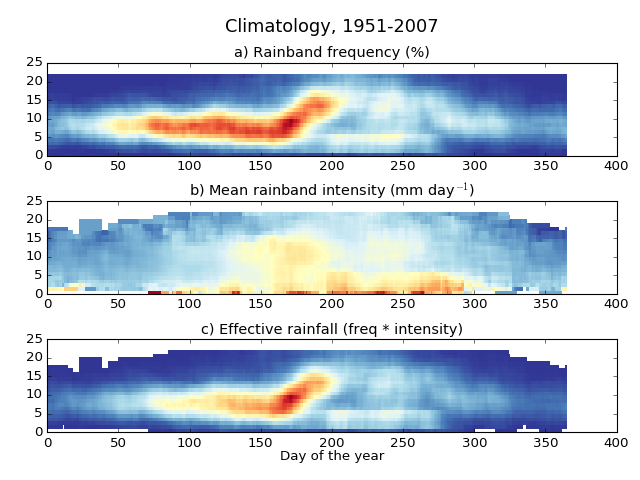

Overwriting existing version of file...
time: 4.37 s


In [22]:
## CLIMATOLOGY PLOT ##

fig, ax = plt.subplots()
ax.set_title("Climatology, 1951-2007", fontsize=16, y = 1.07)
mypalette = 'RdYlBu_r'
ax.set_axis_off()

ax1 = fig.add_subplot(3,1,1)
plot1 = ax1.pcolormesh(freq_climo.T, cmap = mypalette); 
ax1.set_title("a) Rainband frequency (%)", fontsize=13)
#cbar1 = fig.colorbar(plot1, cax = ax1)
#plt.xlabel('Day of the year', fontsize=12, labelpad=0)
#plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)
#plt.yticks(np.linspace(0,80,6),np.linspace(20,40,6).astype(int))

ax2 = fig.add_subplot(3,1,2)
plot2 = ax2.pcolormesh(int_climo.T, cmap = mypalette); 
ax2.set_title("b) Mean rainband intensity (mm day$^{-1}$)", fontsize=13)
#cbar2 = fig.colorbar(plot2, cax = ax2)
#plt.xlabel('Day of the year', fontsize=12, labelpad=0)
#plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)
#plt.yticks(np.linspace(0,80,6),np.linspace(20,40,6).astype(int))


ax3 = fig.add_subplot(3,1,3)
plot3 = ax3.pcolormesh(rain_climo.T, cmap = mypalette); 
ax3.set_title("c) Effective rainfall (freq * intensity)", fontsize=13)
plt.xlabel('Day of the year', fontsize=12, labelpad=0)
#cbar3 = fig.colorbar(plot3, cax = ax3)
#plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)
#plt.yticks(np.linspace(0,80,6),np.linspace(20,40,6).astype(int))

plt.tight_layout(pad=0, w_pad=0, h_pad=.5)

savepath = "/Users/Siwen/RDA/hov_freq_int_climo.pdf"

if os.path.exists(savepath):
    print("Overwriting existing version of file...")
    os.remove(savepath)


plt.savefig(savepath)

In [23]:
## LOAD 1980-2007 v 1951-1979 changes FROM NETCF ##

## NETCDF FILENAMES
freq_diff_file = "RDA_freq_diff_tau_seasonal"
freq_diff_name = ferretdir + freq_diff_file + '.nc'

int_diff_file = "RDA_int_diff"
int_diff_name = ferretdir + int_diff_file + '.nc'

int_pval_file = "RDA_int_diff_bootstrap_2000iter"
int_pval_name = ferretdir + int_pval_file + '.nc'

rain_diff_file = "RDA_effective_rainfall_diff"
rain_diff_name = ferretdir + rain_diff_file + '.nc'

#import from netCDF file and load 57-year climatology
freq_diff_netcdf = nc.Dataset(freq_diff_name, "r")
int_diff_netcdf = nc.Dataset(int_diff_name, "r")
int_pval_netcdf = nc.Dataset(int_pval_name, "r")
rain_diff_netcdf = nc.Dataset(rain_diff_name, "r")

#limits of different time periods that we're comparing
p1_beg = [1951,1980]
p1_end = [1979,1993]
p2_beg = [1980,1994]
p2_end = [2007,2007]

#in this case, we're just going to load the smoothed plots of hovmoller frequency
freq_diff = []
int_diff = []
int_pval = []
rain_diff = []

for p1_b, p1_e, p2_b, p2_e in zip(p1_beg, p1_end, p2_beg, p2_end):

    years_p1= str(p1_b-1900) + str("{0:0=2d}".format((p1_e-1900)%100))
    print(years_p1)
    years_p2= str(p2_b-1900) + str("{0:0=2d}".format((p2_e-1900)%100))
    print(years_p2)
    
    freq_diff.append()
    int_diff.append()
    int_pval.append()
    rain_diff.append()
    

rain_climo = freq_diff_netcdf['rain_effective_' + yb_last2 + ye_last2][:]

#close it
freq_diff_netcdf.close()
int_diff_netcdf.close()
int_pval_netcdf.close()
rain_diff_netcdf.close()

IndentationError: unexpected indent (<ipython-input-23-3aa22a86e7ba>, line 6)

In [ ]:
## CREATE FIGURE OF 1980-2007 v 1951-1979 changes

axlim = max(np.max(abs(P_total_diff_mask[1])),np.max(abs(P_band_diff_mask[1])),np.max(abs(P_local_diff_mask[1])))
print(axlim) #used to scale colorbar
axlim = 4

fig, ax = plt.subplots()
ax.set_title("1994-2007 versus 1980-1993", fontsize=16, y = 1.07)
mypalette = 'bwr_r'

ax1 = fig.add_subplot(3,1,1)
plot1 = ax1.pcolormesh(P_total_diff_mask[1].T, cmap = mypalette, vmin = -axlim, vmax = axlim); 
plt.contour(mk_total[1][1].T,1,colors = 'gray')
ax1.set_title("a) Change in Total Rainfall (mm day$^{-1}$)", fontsize=13)
#plt.xlabel('Day of the year', fontsize=12, labelpad=0)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)
plt.yticks(np.linspace(0,80,6),np.linspace(20,40,6).astype(int))

ax2 = fig.add_subplot(3,1,2)
plot2 = ax2.pcolormesh(P_band_diff_mask[1].T, cmap = mypalette, vmin = -axlim, vmax = axlim); 
plt.contour(mk_band[1][1].T,1,colors = 'gray')
ax2.set_title("b) Change in Banded Rainfall (mm day$^{-1}$)", fontsize=13)
#plt.xlabel('Day of the year', fontsize=12, labelpad=0)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)
plt.yticks(np.linspace(0,80,6),np.linspace(20,40,6).astype(int))


ax3 = fig.add_subplot(3,1,3)
plot3 = ax3.pcolormesh(P_local_diff_mask[1].T, cmap = mypalette, vmin = -axlim, vmax = axlim); 
plt.contour(mk_local[1][1].T,1,colors = 'gray')
ax3.set_title("c) Change in Local Rainfall (mm day$^{-1}$)", fontsize=13)
plt.xlabel('Day of the year', fontsize=12, labelpad=0)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)
plt.yticks(np.linspace(0,80,6),np.linspace(20,40,6).astype(int))

plt.tight_layout(pad=0, w_pad=0, h_pad=.5)
ax.set_axis_off()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([.815, 0.25, 0.02, 0.5])
cbar = fig.colorbar(plot2, cax = cbar_ax, ticks=np.linspace(-axlim,axlim,9))
cbar.ax.set_yticklabels(['<-4',-3,-2,-1,0,1,2,3,'>4'])  # horizontal colorbar

savepath = "/Users/Siwen/RDA/chinarain_diff_8093_9407_flip.pdf"

if os.path.exists(savepath):
    print("Overwriting existing version of file...")
    os.remove(savepath)


plt.savefig(savepath)

In [ ]:
## CREATE FIGURE OF 1980-1993 v 1994-2007 changes

axlim = max(np.max(abs(P_total_diff_mask[1])),np.max(abs(P_band_diff_mask[1])),np.max(abs(P_local_diff_mask[1])))
print(axlim) #used to scale colorbar
axlim = 4

fig, ax = plt.subplots()
ax.set_title("1994-2007 versus 1980-1993", fontsize=16, y = 1.07)
mypalette = 'bwr_r'

ax1 = fig.add_subplot(3,1,1)
plot1 = ax1.pcolormesh(P_total_diff_mask[1].T, cmap = mypalette, vmin = -axlim, vmax = axlim); 
plt.contour(mk_total[1][1].T,1,colors = 'gray')
ax1.set_title("a) Change in Total Rainfall (mm day$^{-1}$)", fontsize=13)
#plt.xlabel('Day of the year', fontsize=12, labelpad=0)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)
plt.yticks(np.linspace(0,80,6),np.linspace(20,40,6).astype(int))

ax2 = fig.add_subplot(3,1,2)
plot2 = ax2.pcolormesh(P_band_diff_mask[1].T, cmap = mypalette, vmin = -axlim, vmax = axlim); 
plt.contour(mk_band[1][1].T,1,colors = 'gray')
ax2.set_title("b) Change in Banded Rainfall (mm day$^{-1}$)", fontsize=13)
#plt.xlabel('Day of the year', fontsize=12, labelpad=0)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)
plt.yticks(np.linspace(0,80,6),np.linspace(20,40,6).astype(int))


ax3 = fig.add_subplot(3,1,3)
plot3 = ax3.pcolormesh(P_local_diff_mask[1].T, cmap = mypalette, vmin = -axlim, vmax = axlim); 
plt.contour(mk_local[1][1].T,1,colors = 'gray')
ax3.set_title("c) Change in Local Rainfall (mm day$^{-1}$)", fontsize=13)
plt.xlabel('Day of the year', fontsize=12, labelpad=0)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)
plt.yticks(np.linspace(0,80,6),np.linspace(20,40,6).astype(int))

plt.tight_layout(pad=0, w_pad=0, h_pad=.5)
ax.set_axis_off()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([.815, 0.25, 0.02, 0.5])
cbar = fig.colorbar(plot2, cax = cbar_ax, ticks=np.linspace(-axlim,axlim,9))
cbar.ax.set_yticklabels(['<-4',-3,-2,-1,0,1,2,3,'>4'])  # horizontal colorbar

savepath = "/Users/Siwen/RDA/chinarain_diff_8093_9407_flip.pdf"

if os.path.exists(savepath):
    print("Overwriting existing version of file...")
    os.remove(savepath)


plt.savefig(savepath)